In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd

%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
plt.style.use('ggplot')

# Lecture 6 –  More Queries and GroupBy

## DSC 10, Fall 2022

### Announcements

- Lab 2 is due on **Saturday 10/8 at 11:59pm**.
- Homework 2 is due on **Tuesday 10/11 at 11:59pm**.
- [Avoid submission errors](https://dsc10.com/syllabus/#submission-errors). You are responsible for submitting your work in the right format to Gradescope by the deadline.
    - If you're unable to submit on time, take a look at our [Deadlines and Slip Days](https://dsc10.com/syllabus/#deadlines-and-slip-days) policy.
- Discussion solutions are posted on Monday evenings to [practice.dsc10.com](https://practice.dsc10.com).

### Agenda

- Recap: queries.
- Queries with multiple conditions.
- GroupBy.
- Extra practice, including challenge problems.

#### Resources:
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view).
- [`babypandas` notes](https://notes.dsc10.com).
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/index.html).
- [Resources tab of the course website](https://dsc10.com/resources/)

### About the Data: Get It Done service requests 👷
<center>
<img height=75% src="images/get-it-done.jpg"/ width=500>
</center>

The `requests` DataFrame contains a summary of all service requests so far in 2022, broken down by neighborhood and service.

In [3]:
requests = bpd.read_csv('data/get-it-done-requests.csv')
requests = requests.assign(total=requests.get('closed') + requests.get('open'))
requests

,neighborhood,service,closed,open,total
0,Balboa Park,Dead Animal,46,0,46
1,Balboa Park,Development Services - Code Enforcement,2,0,2
2,Balboa Park,Encampment,1484,219,1703
3,Balboa Park,Environmental Services Code Compliance,25,1,26
4,Balboa Park,Graffiti,977,0,977
...,...,...,...,...,...
1582,Via De La Valle,Parking,1,0,1
1583,Via De La Valle,Pavement Maintenance,0,1,1
1584,Via De La Valle,Pothole,9,1,10
1585,Via De La Valle,Stormwater Code Enforcement,3,0,3


## Recap: queries

### What is a query? 🤔

- A "query" is code that extracts rows from a DataFrame for which certain condition(s) are true.
- We often use queries to _filter_ DataFrames so that they only contain the rows that satisfy the conditions stated in our questions.

### How do we query a DataFrame?

To select only certain rows of `requests`:

1. Make a sequence (list/array/Series) of `True`s (keep) and `False`s (toss), usually by making a comparison.
2. Then pass it into `requests[sequence_goes_here]`.

### Element-wise comparisons

There are several types of comparisons we can make.

|symbol|meaning|
|--------|--------|
|`==` |equal to |
|`!=` |not equal to |
|`<`|less than|
|`<=`|less than or equal to|
|`>`|greater than|
|`>=`|greater than or equal to|

## Example 6: Which neighborhood has the most `'Weed Cleanup'` requests?

**Key concept**: Selecting rows (via Boolean indexing).

### Strategy

1. Query to extract a DataFrame of just the `'Weed Cleanup'` requests.
2. Sort by `'total'` in descending order.
3. Extract the first element from the `'neighborhood'` column.

In [4]:
weed_cleanup_only = requests[requests.get('service') == 'Weed Cleanup']
weed_cleanup_only

,neighborhood,service,closed,open,total
30,Balboa Park,Weed Cleanup,23,0,23
61,Barrio Logan,Weed Cleanup,10,1,11
87,Black Mountain Ranch,Weed Cleanup,0,1,1
116,Carmel Mountain Ranch,Weed Cleanup,2,0,2
146,Carmel Valley,Weed Cleanup,6,1,7
...,...,...,...,...,...
1433,Tijuana River Valley,Weed Cleanup,2,0,2
1489,Torrey Hills,Weed Cleanup,1,0,1
1518,Torrey Pines,Weed Cleanup,10,7,17
1549,University,Weed Cleanup,53,10,63


In [5]:
weed_cleanup_sorted = weed_cleanup_only.sort_values(by='total', ascending=False)
weed_cleanup_sorted

,neighborhood,service,closed,open,total
1383,Southeastern San Diego,Weed Cleanup,72,7,79
807,Navajo,Weed Cleanup,66,1,67
177,Clairemont Mesa,Weed Cleanup,55,11,66
1549,University,Weed Cleanup,53,10,63
1352,Skyline-Paradise Hills,Weed Cleanup,52,8,60
...,...,...,...,...,...
268,East Elliott,Weed Cleanup,1,0,1
309,Fairbanks Ranch Country Club,Weed Cleanup,1,0,1
1489,Torrey Hills,Weed Cleanup,1,0,1
87,Black Mountain Ranch,Weed Cleanup,0,1,1


In [6]:
weed_cleanup_sorted.get('neighborhood').iloc[0]

'Southeastern San Diego'

### What if the condition isn't satisfied?

In [7]:
requests[requests.get('service') == 'Lime Cleanup']

,neighborhood,service,closed,open,total


### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Which expression below evaluates to **the total number of service requests in the `'Downtown'` neighborhood**?

A. `requests[requests.get('neighborhood') == 'Downtown'].get('total').sum()`

B. `requests.get('total').sum()[requests.get('neighborhood') == 'Downtown']`

C. `requests['Downtown'].get('total').sum()`
   
D. More than one of the above.

In [ ]:
...

### Activity 🚘

**Question**: What is the most commonly requested service in the `'University'` neighborhood (near UCSD)?

Write one line of code that evaluates to the answer.

In [37]:
requests[requests.get('neighborhood') == 'University'].sort_values(by='total').iloc[-1]

neighborhood    University
service            Parking
closed                 546
open                    59
total                  605
Name: 1529, dtype: object

## Example 7: How many service requests were for `'Pothole'` or `'Pavement Maintenance'`?

**Key concept**: Queries with multiple conditions.

### Multiple conditions

- To write a query with multiple conditions, use `&` for "and" and `|` for "or".
- **You must use `(`parentheses`)` around each condition!**
- ⚠️ Don't use the Python keywords `and` and `or` here! They do not behave as you'd want.
    - See [BPD 10.3](https://notes.dsc10.com/02-data_sets/querying.html#multiple-conditions) for an explanation.

In [16]:
requests[(requests.get('service') == 'Pothole') | (requests.get('service') == 'Pavement Maintenance')]

,neighborhood,service,closed,open,total
12,Balboa Park,Pavement Maintenance,15,10,25
13,Balboa Park,Pothole,109,1,110
43,Barrio Logan,Pavement Maintenance,10,12,22
44,Barrio Logan,Pothole,128,0,128
72,Black Mountain Ranch,Pavement Maintenance,2,2,4
...,...,...,...,...,...
1532,University,Pothole,363,2,365
1562,Uptown,Pavement Maintenance,46,110,156
1563,Uptown,Pothole,597,9,606
1583,Via De La Valle,Pavement Maintenance,0,1,1


In [17]:
# You can add line breaks within brackets or parentheses
requests[(requests.get('service') == 'Pothole') | 
         (requests.get('service') == 'Pavement Maintenance')]

,neighborhood,service,closed,open,total
12,Balboa Park,Pavement Maintenance,15,10,25
13,Balboa Park,Pothole,109,1,110
43,Barrio Logan,Pavement Maintenance,10,12,22
44,Barrio Logan,Pothole,128,0,128
72,Black Mountain Ranch,Pavement Maintenance,2,2,4
...,...,...,...,...,...
1532,University,Pothole,363,2,365
1562,Uptown,Pavement Maintenance,46,110,156
1563,Uptown,Pothole,597,9,606
1583,Via De La Valle,Pavement Maintenance,0,1,1


### The `&` and `|` operators work element-wise

In [18]:
(requests.get('service') == 'Pothole')

0       False
1       False
2       False
3       False
4       False
        ...  
1582    False
1583    False
1584     True
1585    False
1586    False
Name: service, Length: 1587, dtype: bool

In [19]:
(requests.get('service') == 'Pavement Maintenance')

0       False
1       False
2       False
3       False
4       False
        ...  
1582    False
1583     True
1584    False
1585    False
1586    False
Name: service, Length: 1587, dtype: bool

In [20]:
(requests.get('service') == 'Pothole') | (requests.get('service') == 'Pavement Maintenance')

0       False
1       False
2       False
3       False
4       False
        ...  
1582    False
1583     True
1584     True
1585    False
1586    False
Name: service, Length: 1587, dtype: bool

### Original Question: How many service requests were for `'Pothole'` or `'Pavement Maintenance'`?

In [21]:
requests[(requests.get('service') == 'Pothole') | 
         (requests.get('service') == 'Pavement Maintenance')].get('total').sum()

13980

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Each of the following questions can be answered by querying the `requests` DataFrame.

1. Which neighborhood had the most `'Street Flooded'` requests?
2. In the `'Kearny Mesa'` neighborhood, how many different types of services have open requests?
3. How many requests have been closed in the `'La Jolla'` neighborhood?

How many of the questions above **require** the query to have **multiple conditions**?

A. 0 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
B. 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
C. 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   D. 3

**Bonus**: Try to write the code to answer each question.

In [ ]:
...

## Example 8: Which neighborhood had the most Get It Done requests?

**Key concept**: Grouping by one column.

### Organizing requests by neighborhood

- We can find the total number of Get It Done requests for any one neighborhood.
    - For example, `requests[requests.get('neighborhood') == 'Carmel Valley'].get('total').sum()`.
- But how can we find the total requests for **every** neighborhood at the same time?

In [22]:
requests[requests.get('neighborhood') == 'Carmel Valley'].get('total').sum()

1992

In [23]:
requests[requests.get('neighborhood') == 'Torrey Hills'].get('total').sum()

305

It seems like there has to be a better way. And there is!

### GroupBy: Split, aggregate, and combine

Observe what happens when we use the `.groupby` method on `requests` with the argument `'neighborhood'`.

In [24]:
requests.groupby('neighborhood').sum()

,closed,open,total
neighborhood,,,
Balboa Park,5003,773,5776
Barrio Logan,2158,518,2676
Black Mountain Ranch,331,63,394
Carmel Mountain Ranch,732,157,889
Carmel Valley,1641,351,1992
...,...,...,...
Torrey Hills,220,85,305
Torrey Pines,775,200,975
University,3435,479,3914


Note that the `'total'` counts for Carmel Valley and Torrey Hills are the same as we saw on the previous slide. What just happened? 🤯

### An illustrative example: Pets 🐱 🐶🐹

Consider the DataFrame `pets` containing pet species, colors, and weights.


In [25]:
pets = bpd.DataFrame().assign(
    Species=['dog', 'cat', 'cat', 'dog', 'dog', 'hamster'],
    Color=['black', 'golden', 'black', 'white', 'golden', 'golden'],
    Weight=[40, 15, 20, 80, 25, 1],
    Age=[5, 8, 9, 2, 0.5, 3]
)
pets

,Species,Color,Weight,Age
0,dog,black,40,5.0
1,cat,golden,15,8.0
2,cat,black,20,9.0
3,dog,white,80,2.0
4,dog,golden,25,0.5
5,hamster,golden,1,3.0


### Visualizing `pets.groupby('Species').mean()`

1. **Split** the rows of `pets` into "groups" according to their values in the `'Species'` column.
2. **Aggregate** the rows with the same value of `'Species'` by taking the `mean` of all numerical columns.
3. **Combine** these means into a new DataFrame that is indexed by `'Species'` and sorted by `'Species'` in ascending order.

Note that the result contains just one row for cats, one row for dogs, and one row for hamsters!

In [26]:
%%pt

pets.groupby('Species').mean()

### Pandas Tutor

- In the last cell, we saw not just the output of the code, but a visualization of the inner workings of the code.
- This is thanks to Pandas Tutor, a new tool developed by [Sam Lau](https://www.samlau.me), who taught this course over the summer.
- Pandas Tutor draws diagrams to explain `pandas` (and `babypandas`) code.
- Add `%%pt` to the top of a code cell to explain the last line of `babypandas` code.
    - This requires Pandas Tutor to be imported, which we already did in this notebook.
- You can also use Pandas Tutor through its website, [pandastutor.com](https://pandastutor.com/).

In [27]:
# Without Pandas Tutor
pets.groupby('Species').mean()

,Weight,Age
Species,,
cat,17.500000,8.5
dog,48.333333,2.5
hamster,1.000000,3.0


In [28]:
%%pt

# With Pandas Tutor
pets.groupby('Species').mean()

### Back to Get It Done service requests 👷

In [29]:
requests

,neighborhood,service,closed,open,total
0,Balboa Park,Dead Animal,46,0,46
1,Balboa Park,Development Services - Code Enforcement,2,0,2
2,Balboa Park,Encampment,1484,219,1703
3,Balboa Park,Environmental Services Code Compliance,25,1,26
4,Balboa Park,Graffiti,977,0,977
...,...,...,...,...,...
1582,Via De La Valle,Parking,1,0,1
1583,Via De La Valle,Pavement Maintenance,0,1,1
1584,Via De La Valle,Pothole,9,1,10
1585,Via De La Valle,Stormwater Code Enforcement,3,0,3


In [35]:
requests.groupby('neighborhood').sum().sort_values('total').index[0]

'Via De La Valle'

### Using `.groupby` in general

In short, `.groupby` aggregates all rows with the same value in a specified column (e.g. `'neighborhood'`) into a single row in the resulting DataFrame, using an aggregation method (e.g. `.sum()`) to combine values.

1. **Choose a column to group by**.
    - `.groupby(column_name)` will gather rows which have the same value in the specified column (`column_name`).
    - On the previous slide, we grouped by `'neighborhood'`.
    - In the resulting DataFrame, there was one row for every unique value of `'neighborhood'`.
2. **Choose an aggregation method**.
    - The aggregation method will be applied **within** each group.
    - On the previous slide, we applied the `.sum()` method to every `'neighborhood'`.
    - The aggregation method is applied individually to each column (e.g. the sums were computed separately for `'closed'`, `'open'`, and `'total'`). 
        - If it doesn't make sense to use the aggregation method on a column, the column is dropped from the output – we'll look at this in more detail shortly.
    - Common aggregation methods include `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, and `.min()`.

### Observation #1

- The index has changed to neighborhood names.
- In general, the new row labels are the *group labels* (i.e., the unique values in the column that we grouped on).

In [31]:
requests

,neighborhood,service,closed,open,total
0,Balboa Park,Dead Animal,46,0,46
1,Balboa Park,Development Services - Code Enforcement,2,0,2
2,Balboa Park,Encampment,1484,219,1703
3,Balboa Park,Environmental Services Code Compliance,25,1,26
4,Balboa Park,Graffiti,977,0,977
...,...,...,...,...,...
1582,Via De La Valle,Parking,1,0,1
1583,Via De La Valle,Pavement Maintenance,0,1,1
1584,Via De La Valle,Pothole,9,1,10
1585,Via De La Valle,Stormwater Code Enforcement,3,0,3


In [46]:
requests.groupby('neighborhood').sum()

,closed,open,total
neighborhood,,,
Balboa Park,5003,773,5776
Barrio Logan,2158,518,2676
Black Mountain Ranch,331,63,394
Carmel Mountain Ranch,732,157,889
Carmel Valley,1641,351,1992
...,...,...,...
Torrey Hills,220,85,305
Torrey Pines,775,200,975
University,3435,479,3914


### Observation #2

The `'service'` column has disappeared. Why?

In [33]:
requests

,neighborhood,service,closed,open,total
0,Balboa Park,Dead Animal,46,0,46
1,Balboa Park,Development Services - Code Enforcement,2,0,2
2,Balboa Park,Encampment,1484,219,1703
3,Balboa Park,Environmental Services Code Compliance,25,1,26
4,Balboa Park,Graffiti,977,0,977
...,...,...,...,...,...
1582,Via De La Valle,Parking,1,0,1
1583,Via De La Valle,Pavement Maintenance,0,1,1
1584,Via De La Valle,Pothole,9,1,10
1585,Via De La Valle,Stormwater Code Enforcement,3,0,3


In [34]:
requests.groupby('neighborhood').sum()

,closed,open,total
neighborhood,,,
Balboa Park,5003,773,5776
Barrio Logan,2158,518,2676
Black Mountain Ranch,331,63,394
Carmel Mountain Ranch,732,157,889
Carmel Valley,1641,351,1992
...,...,...,...
Torrey Hills,220,85,305
Torrey Pines,775,200,975
University,3435,479,3914


### Disappearing columns ✨🐇🎩  

- The aggregation method – `.sum()`, in this case – is applied to each column.
- If it doesn't make sense to apply it to a particular column, that column will disappear.
- For instance, we _can't_ sum strings, like in the `'service'` column.
- However, we _can_ compute the max of several strings. How?

In [48]:
%%pt
# Can you guess how the max position is determined?
requests.groupby('neighborhood').max() 

### Observation #3

- The aggregation method is applied to each column **separately**.
- The rows of the resulting DataFrame need to be interpreted with care.

In [ ]:
requests.groupby('neighborhood').max()

- Have there been 1703 `'Weed Cleanup'` requests in Balboa Park so far this year?
- Why isn't the `'total'` column equal to the sum of the `'closed'` and `'open'` columns, as it originally was?

### Activity

Write a line of code that evaluates to **the service that has been requested in the fewest number of neighborhoods**. 

**Strategy**:
   1. Choose a column to group by.
   2. Choose an aggregation method. Some common ones are `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, and `.min()`.
   3. Sort the resulting DataFrame and extract the relevant piece of information (the service name).

In [66]:
requests.groupby('service').count().sort_values('neighborhood')

,neighborhood,closed,open,total
service,,,,
Homeless Outreach,1,1,1,1
Oversized Vehicle,1,1,1,1
Shared Mobility Device,31,31,31,31
Waste on Private Property,45,45,45,45
Development Services - Code Enforcement,47,47,47,47
...,...,...,...,...
Dead Animal,54,54,54,54
Street Light Maintenance,55,55,55,55
Tree Maintenance,55,55,55,55


_Note:_ On an assignment, in questions like this with multiple correct answers (a tie for the fewest), you can put any one of them. We'll accept any correct answer.

### Observation #4

- The column names of the output of `.groupby` don't make sense when using the `.count()` aggregation method.
- Consider dropping unneeded columns and renaming columns as follows:
    1. Use `.assign` to create a new column containing the same values as the old column(s).
    2. Use `.drop(columns=list_of_column_labels)` to drop the old column(s).

In [67]:
num_neighborhoods = requests.groupby('service').count()
num_neighborhoods

,neighborhood,closed,open,total
service,,,,
Dead Animal,54,54,54,54
Development Services - Code Enforcement,47,47,47,47
Encampment,54,54,54,54
Environmental Services Code Compliance,47,47,47,47
Graffiti,53,53,53,53
...,...,...,...,...
Traffic Signal Timing,49,49,49,49
Trash/Recycling Collection,48,48,48,48
Tree Maintenance,55,55,55,55


In [68]:
num_neighborhoods = num_neighborhoods.assign(
                    neighborhoods_requesting=num_neighborhoods.get('total')
                    ).drop(columns=['neighborhood', 'closed', 'open', 'total'])
num_neighborhoods

,neighborhoods_requesting
service,
Dead Animal,54
Development Services - Code Enforcement,47
Encampment,54
Environmental Services Code Compliance,47
Graffiti,53
...,...
Traffic Signal Timing,49
Trash/Recycling Collection,48
Tree Maintenance,55


## More practice: IMDb dataset 🎞️

<center>
<img width=40% src="images/imdb.png"/>
</center>

In [69]:
imdb = bpd.read_csv('data/imdb.csv').set_index('Title').sort_values(by='Rating')
imdb

,Votes,Rating,Year,Decade
Title,,,,
Akira,91652,8.0,1988,1980
Per un pugno di dollari,124671,8.0,1964,1960
Guardians of the Galaxy,527349,8.0,2014,2010
The Man Who Shot Liberty Valance,49135,8.0,1962,1960
Underground,39447,8.0,1995,1990
...,...,...,...,...
Schindler's List,761224,8.9,1993,1990
12 Angry Men,384187,8.9,1957,1950
The Godfather: Part II,692753,9.0,1974,1970


### Question: How many movies appear from each decade?

In [70]:
imdb.groupby('Decade').count()

,Votes,Rating,Year
Decade,,,
1920,4,4,4
1930,7,7,7
1940,14,14,14
1950,30,30,30
1960,22,22,22
1970,21,21,21
1980,31,31,31
1990,42,42,42
2000,50,50,50


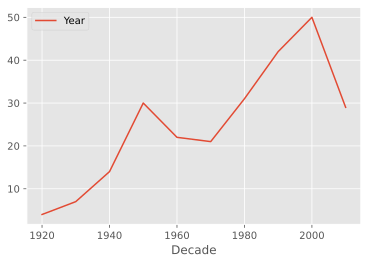

In [71]:
# We'll learn how to make plots like this in the next lecture!
imdb.groupby('Decade').count().plot(y='Year');

### Question: What was the highest rated movie of the 1990s?

Let's try to do this two different ways.

#### Without grouping

In [72]:
%%pt
imdb[imdb.get('Decade') == 1990].sort_values('Rating', ascending=False).index[0]

_Note:_ The command to extract the index of a DataFrame is `.index` - no parentheses! This is different than the way we extract columns, with `.get()`, because the index is not a column.

#### With grouping

In [73]:
%%pt
imdb.reset_index().groupby('Decade').max()

- It turns out that this method **does not** yield the correct answer. 
- When we use an aggregation method (e.g. `.max()`), aggregation is done to each column individually. 
- While it's true that the highest rated movie from the 1990s has a rating of 9.2, that movie is **not** Unforgiven – instead, Unforgiven is the movie that's the latest in the alphabet among all movies from the 1990s.
- Taking the `max` is not helpful here.

## Challenge problems

We won't cover these problems in class, but they're here for you to practice with some harder examples. To access the solutions, you'll need to watch [this solution walkthrough video](https://youtu.be/xg7rnjWnZ48) (start at 10:00).

Before watching the video, **make sure to try these problems on your own** – they're great prep for homeworks, projects, and exams!

### Question: How many years have more than 3 movies rated above 8.5?

In [106]:
imdb_score = imdb[imdb.get('Rating') > 8.5]
imdb_count = imdb_score.groupby('Year').count()
imdb_res = imdb_count[imdb_count.get('Rating') > 3]
print(len(imdb_res.index), imdb_res.index[0])

1 1994


#### Aside: Using `.sum()` on a Boolean array/Series

- Summing a Boolean array/Series gives a count of the number of `True` elements. This is because Python treats `True` as 1 and `False` as 0. 
- Can you use that fact here?

### Question: Out of the years with more than 3 movies, which had the highest average rating?

### Question: Which year had the longest movie titles, on average?

_Hint:_ Use `.str.len()` on the column or index that contains the names of the movies.

### Question: What is the average rating of movies from years that had at least 3 movies in the Top 250?

## Summary, next time

### Summary

- We can write queries that involve multiple conditions, as long as we:
    - Put parentheses around all conditions.
    - Separate conditions using `&` if you require all to be true, or `|` if you require at least one to be true.
- The method call `df.groupby(column_name).agg_method()` **aggregates** all rows with the same value for `column_name` into a single row in the resulting DataFrame, using `agg_method()` to combine values.
    - Aggregation methods to know: `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, and `.min()`.

### Next time

 A picture is worth a 1000 words – it's time to visualize!